Imports

In [152]:
import pandas as pd
import numpy as np

In [153]:
ds = pd.read_csv('falls_vs_normal.csv')
#ds

In [154]:
import random
#print(ds)
def shuffle_data(ds, window_size):
  liste = []
  ds_arr = ds.to_numpy()
  for i in range(0, len(ds_arr), window_size):
    if i % 400 == 0:
      liste.append(ds_arr[i:i+window_size])
  random.shuffle(liste)
  return np.array(liste)
list = shuffle_data(ds, 400)
#print(list)
#list.shape


In [155]:
samples = []
for sample in list:
  for row in sample:
    samples.append(row)
      
data = pd.DataFrame(samples)
#data

In [156]:

def split_observations(data, window_size):
  ds_arr = data.to_numpy()
  #ds_arr = list
  observations = []
  y_values = []

  for i in range(0, len(ds_arr), window_size):
    observation = ds_arr[i:i + window_size, :-1]  # Slice a window, exclude last col
    observations.append(observation)

    # Append y value every window_size (i.e., every 400 values)
    if i % 400 == 0:  # Check for divisibility by 400, not remainder
      y_value = ds_arr[i, -1]
      # Convert string to 1 if it contains "fall", otherwise 0
      y_value = 1 if "fall" in y_value else 0
      y_values.append(y_value)
      #y_values.append(ds_arr[i, -1])  # Append only the last value of the window

  return np.array(observations), np.array(y_values)
        

In [157]:
WINDOW_SIZE = 400
x, y = split_observations(data, WINDOW_SIZE)
#x.shape, y.shape

In [158]:
X_train, y_train = x[:200], y[:200]
X_val, y_val = x[200:220], y[200:220]
X_test, y_test = x[220:], y[220:]
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
#X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
#print(y_train)


((200, 400, 6), (200,), (20, 400, 6), (20,), (22, 400, 6), (22,))

In [159]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train contains string labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)
#y_train.shape, y_val.shape, y_test.shape

In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [161]:
model1 = Sequential()
model1.add(InputLayer((400,6)))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(64, return_sequences=True))
model1.add(LSTM(32, return_sequences=True))
model1.add(LSTM(16))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 400, 128)       │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 400, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 400, 32)        │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,369 (524.88 KB)

 Trainable params: 134,369 (524.88 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
cp = ModelCheckpoint('model1/model.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=['Accuracy', 'Precision', 'Recall'])

In [163]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 354ms/step - Accuracy: 0.6865 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.4145 - val_Accuracy: 0.8000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.2248
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - Accuracy: 0.6915 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.3173 - val_Accuracy: 0.8000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.1817
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - Accuracy: 0.7228 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.2337 - val_Accuracy: 0.8000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.1468
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - Accuracy: 0.7145 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - loss: 0.2039 - val_Accuracy: 0.8000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.1160
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - Accuracy: 0.6742 - Precision: 0.0000e+00 - Recall: 0

In [164]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/model.keras')

In [165]:
#print(len(X_val))
val_predictions = model1.predict(X_val).flatten()
#print(val_predictions)
#print(len(val_predictions))
#print(len(y_val))
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actual':y_val})
#val_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


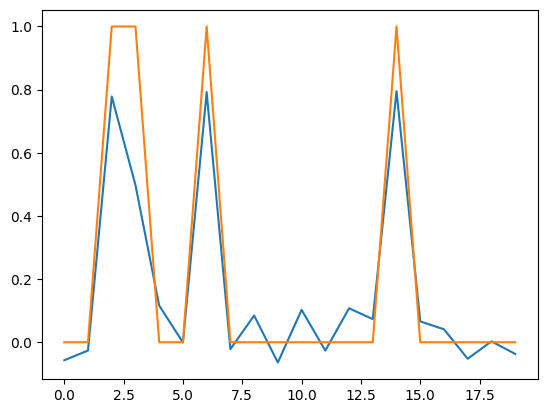

In [166]:
import matplotlib.pyplot as plt
plt.plot(val_results['Val Predictions'][:200])
plt.plot(val_results['Actual'][:200])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


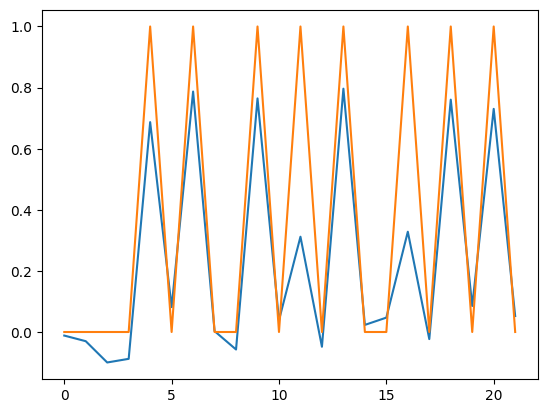

In [167]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actual':y_test})
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actual'])